<a href="https://colab.research.google.com/github/edufsi/Projeto-Desafio/blob/Eduardo/ImportacaoCommodities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
# Função toma um ano inicial e um ano final entre o intervalo aceito (1988, 2022) e retorna um dataframe
# que vai do ano inicial ao final com os dados de importações e exportações de comomdities no mundo

def imp_dados_commodities(ano_inicio, ano_fim):
  if ano_inicio < 1988 or ano_fim > 2022 or ano_inicio > ano_fim:
    raise Exception("Datas para importação dos dados inválidas. O ano mínimo é 1988 e o ano máximo é 2022")

  dados_finais = pd.DataFrame()

  for i in range(ano_inicio, ano_fim + 1):
    dados = pd.read_csv(f'https://github.com/edufsi/Projeto-Desafio/raw/Eduardo/Dados/dados_commodities/Commoditites{i}.zip', encoding='ISO-8859-1', sep=',', compression='zip')
    dados_finais = pd.concat([dados_finais, dados])

  dados_finais.index = range(len(dados_finais))

  return dados_finais

dados_commodities = imp_dados_commodities(1988, 2022)

dados_commodities

,Unnamed: 0,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,4631,Australia,1988,"Horses, live pure-bred breeding",Import,2.791356e+07,NaN,Number of items,606.0
1,4632,Australia,1988,"Horses, live pure-bred breeding",Export,1.288634e+07,224009.0,Weight in kilograms,224009.0
2,4633,Australia,1988,"Horses, live pure-bred breeding",Re-Export,9.990710e+05,11062.0,Weight in kilograms,11062.0
3,4634,Australia,1988,"Horses, live except pure-bred breeding",Import,8.631928e+07,NaN,Number of items,2667.0
4,4635,Australia,1988,"Horses, live except pure-bred breeding",Export,9.287476e+06,309631.0,Weight in kilograms,309631.0
...,...,...,...,...,...,...,...,...,...
7339952,7339619,USA,2022,Commodities not specified according to kind,Export,1.567469e+11,NaN,No Quantity,NaN
7339953,7339713,Uzbekistan,2022,Commodities not specified according to kind,Export,3.217581e+08,NaN,No Quantity,NaN
7339954,7339714,Uzbekistan,2022,Commodities not specified according to kind,Import,6.031738e+07,NaN,No Quantity,NaN
7339955,7339903,Zimbabwe,2022,Commodities not specified according to kind,Export,1.212823e+06,NaN,No Quantity,NaN


In [ ]:

dados_commodities_brasil = dados_commodities.query('`Country or Area` == "Brazil"')


dados_commodities_brasil


,Unnamed: 0,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
6619,12600,Brazil,1989,"Horses, live pure-bred breeding",Export,3.880000e+04,7771.000,Weight in kilograms,7771.000
6620,12601,Brazil,1989,"Horses, live pure-bred breeding",Import,9.859797e+06,239639.000,Weight in kilograms,239639.000
6621,12602,Brazil,1989,"Horses, live except pure-bred breeding",Export,1.269520e+05,32874.000,Weight in kilograms,32874.000
6622,12603,Brazil,1989,"Horses, live except pure-bred breeding",Import,4.025020e+05,176359.000,Weight in kilograms,176359.000
6623,12604,Brazil,1989,"Asses, mules and hinnies, live",Export,2.000000e+04,2812.000,Weight in kilograms,2812.000
...,...,...,...,...,...,...,...,...,...
7337677,7286345,Brazil,2022,Antiques; of an age exceeding 250 years,Import,8.648000e+03,50.000,Weight in kilograms,50.000
7337678,7286346,Brazil,2022,Antiques; of an age exceeding 100 years but no...,Export,2.979940e+05,24454.331,Weight in kilograms,24454.331
7337679,7286347,Brazil,2022,Antiques; of an age exceeding 100 years but no...,Import,5.743800e+04,11693.200,Weight in kilograms,11693.200
7339768,7332275,Brazil,2022,Commodities not specified according to kind,Export,7.768603e+08,NaN,No Quantity,NaN


In [ ]:
dados_brasil_2022 = dados_commodities_brasil.query('Year == 2022')

In [ ]:
# Agrupa e soma
soma_commodities_brasil_2022 = dados_brasil_2022.groupby(['Flow', 'Commodity'])['Trade (USD)'].sum()
soma_commodities_total = dados_commodities_brasil.groupby(['Flow', 'Commodity'])['Trade (USD)'].sum()

# Desagrupa
soma_commodities_brasil_2022 = soma_commodities_brasil_2022.reset_index()
soma_commodities_total = soma_commodities_total.reset_index()

# Separa importação e exportação para 2022
soma_imp_brasil_2022 = soma_commodities_brasil_2022[soma_commodities_brasil_2022['Flow'] == "Import"]
soma_exp_brasil_2022 = soma_commodities_brasil_2022[soma_commodities_brasil_2022['Flow'] == "Export"]

# Separa importação e exportação total
soma_imp_brasil = soma_commodities_total[soma_commodities_total['Flow'] == "Import"]
soma_exp_brasil = soma_commodities_total[soma_commodities_total['Flow'] == "Export"]

# Ordena os valores em ordem decrescente
soma_exp_brasil_2022.sort_values('Trade (USD)', inplace=True, ascending=False)
soma_imp_brasil_2022.sort_values('Trade (USD)', inplace=True, ascending=False)

soma_imp_brasil.sort_values('Trade (USD)', inplace=True, ascending=False)
soma_exp_brasil.sort_values('Trade (USD)', inplace=True, ascending=False)

<ipython-input-86-38347f327e03>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soma_exp_brasil_2022.sort_values('Trade (USD)', inplace=True, ascending=False)
<ipython-input-86-38347f327e03>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soma_imp_brasil_2022.sort_values('Trade (USD)', inplace=True, ascending=False)
<ipython-input-86-38347f327e03>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soma_imp_brasil.sort_values('Trade 

In [ ]:
# TOP 10 IMPORTAÇÕES EM 2022
soma_imp_brasil_2022.head(10)

,Flow,Commodity,Trade (USD)
8066,Import,Petroleum oils and oils from bituminous minera...,1.728734e+10
7881,Import,Oils; petroleum oils and oils obtained from bi...,1.014510e+10
6317,Import,"Fertilizers, mineral or chemical; potassic, po...",9.395244e+09
8065,Import,Petroleum oils and oils from bituminous minera...,7.395513e+09
5516,Import,"Coal; bituminous, whether or not pulverised, b...",5.379828e+09
6312,Import,"Fertilizers, mineral or chemical; nitrogenous,...",4.826461e+09
5570,Import,Commodities not specified according to kind,4.356671e+09
6296,Import,"Fertilizers, mineral or chemical; ammonium dih...",3.986539e+09
5875,Import,Electrical apparatus; photosensitive semicondu...,3.942279e+09
8061,Import,Petroleum gases and other gaseous hydrocarbons...,3.572716e+09


In [ ]:
# TOP 10 EXPORTAÇÕES EM 2022
soma_exp_brasil_2022.head(10)

,Flow,Commodity,Trade (USD)
3845,Export,"Soya beans; other than seed, whether or not br...",4.665905e+10
3082,Export,Oils; petroleum oils and oils obtained from bi...,4.268810e+10
2271,Export,Iron ores and concentrates; non-agglomerated,2.569902e+10
3259,Export,Petroleum oils and oils from bituminous minera...,1.232316e+10
569,Export,"Cereals; maize (corn), other than seed",1.215454e+10
2727,Export,"Meat; of bovine animals, boneless cuts, frozen",1.091786e+10
3067,Export,Oil-cake and other solid residues; whether or ...,1.033953e+10
4016,Export,"Sugars; cane sugar, raw, in solid form, other ...",9.527260e+09
700,Export,Coffee; not roasted or decaffeinated,8.514137e+09
4669,Export,"Wood pulp; chemical wood pulp, soda or sulphat...",7.679247e+09


In [ ]:
# TOP 10 IMPORTAÇÕES TOTAIS
soma_imp_brasil.head(10)

,Flow,Commodity,Trade (USD)
9422,Import,Petroleum oils and oils from bituminous minera...,1.135382e+11
9216,Import,Oils; petroleum oils and oils obtained from bi...,1.110408e+11
9421,Import,Petroleum oils and oils from bituminous minera...,6.053932e+10
7343,Import,"Fertilizers, mineral or chemical; potassic, po...",4.783001e+10
10934,Import,Vehicles; with only spark-ignition internal co...,4.072123e+10
6440,Import,"Coal; bituminous, whether or not pulverised, b...",3.555556e+10
8856,Import,Medicaments; consisting of mixed or unmixed pr...,3.343444e+10
9790,Import,Reception and transmission apparatus; for use ...,3.195533e+10
10444,Import,Telephone sets and other apparatus for the tra...,3.173153e+10
9412,Import,Petroleum gases and other gaseous hydrocarbons...,2.967211e+10


In [ ]:
# TOP 10 EXPORTAÇÕES TOTAIS
soma_exp_brasil.head(10)

,Flow,Commodity,Trade (USD)
4509,Export,"Soya beans; other than seed, whether or not br...",3.023024e+11
2640,Export,Iron ores and concentrates; non-agglomerated,2.892529e+11
3578,Export,Oils; petroleum oils and oils obtained from bi...,2.683415e+11
842,Export,Coffee; not roasted or decaffeinated,1.157607e+11
5411,Export,"Wood pulp; chemical wood pulp, soda or sulphat...",1.042602e+11
4508,Export,"Soya beans, whether/not broken",9.857798e+10
3171,Export,"Meat; of bovine animals, boneless cuts, frozen",8.493959e+10
4689,Export,"Sugars; cane sugar, raw, in solid form, other ...",8.436836e+10
3562,Export,Oil-cake and other solid residues; whether or ...,8.284961e+10
3148,Export,Meat and edible offal; of fowls of the species...,7.833452e+10


In [ ]:
# Talvez seja melhor trabalharmos com os dados de 2020, já que tem muitos países faltando em 2022

dados_2021 = dados_commodities.query('Year == 2021')
dados_2022 = dados_commodities.query('Year == 2022')
dados_2020 = dados_commodities.query('Year == 2020')

print(len(dados_2021['Country or Area'].unique()))
print(len(dados_2022['Country or Area'].unique()))
print(len(dados_2020['Country or Area'].unique()))



151
108
157


In [ ]:
# Vamos criar o gráfico mapa das commodities para 2020:

# Importaremos os dados das commodities para 2020
dados_2022 = imp_dados_commodities(2020, 2020)

# Separaremos as exportações e as commodities especificadas
dados_nao_especificados = dados_2022.query('Flow == "Export"')
dados_2022 = dados_2022.query('Flow == "Export" & Commodity != "Commodities not specified according to kind"')


# Agora, para cada país no DataFrame queremos tirar a commoditie que este país mais exportou
mais_exportadas = pd.DataFrame()
mais_exportadas_total = pd.DataFrame()

for pais in dados_2022['Country or Area'].unique():
  dados_pais = dados_2022.query('`Country or Area` == @pais')
  maior = dados_pais['Trade (USD)'].idxmax()

  mais_exportadas = pd.concat([mais_exportadas, dados_2022.loc[maior]], axis=1)


for pais in dados_nao_especificados['Country or Area'].unique():
  dados_pais2 = dados_nao_especificados.query('`Country or Area` == @pais')
  maior = dados_pais2['Trade (USD)'].idxmax()

  mais_exportadas_total = pd.concat([mais_exportadas_total, dados_nao_especificados.loc[maior]], axis=1)

mais_exportadas = mais_exportadas.T

mais_exportadas_total = mais_exportadas_total.T


# Vamos ordenar os dados para facilitar a visualização
mais_exportadas.sort_values('Trade (USD)', ascending=False, inplace=True)
mais_exportadas_total.sort_values('Trade (USD)', ascending=False, inplace=True)

# Vamos criar categorias para os dados para simplificar nosso gráfico
mais_exportadas["Commodity"].replace(regex=r'.*(Petroleum|petroleum|Coal).*', value='Fossil Fuels', inplace=True)

mais_exportadas["Commodity"].replace(regex=r'.*ores.*', value='Ores and Metals', inplace=True)
mais_exportadas["Commodity"].replace(regex=r'.*(unwrought|gold|Copper|Nickel).*', value='Ores and Metals', inplace=True)

mais_exportadas["Commodity"].replace(regex=r'.*(circuits|smartphones|Telephones).*', value= 'Computers and Integrated Circuits', inplace=True)
mais_exportadas["Commodity"].replace(regex=r'.*(Aeroplanes|Vessels|Sailboats).*', value= 'Means of Transport', inplace=True)
mais_exportadas["Commodity"].replace(regex=r'.*(milk|Fish|sunflower|Tobacco|Flowers|Nuts|Cocoa|Cereals|Spices|Fruit|Wheat|Soya|soya|Coffee|Sugars|Vegetable|tobacco).*', value= 'Vegetable or Animal Products', inplace=True)
mais_exportadas["Commodity"].replace(regex=r'.*(Medicaments|Blood).*', value= 'Medicaments', inplace=True)
mais_exportadas["Commodity"].replace(regex=r'.*(Fertilizers|Odoriferous|coal tar|Cosmetic|Rum|Beer).*', value= 'Chemicals and Distillates', inplace=True)
mais_exportadas["Commodity"].replace(regex=r'.*(Nonwovens|Paintings|Footwear|Sports|Tricycles|Musical|Jewellery|Diamonds|Pearls).*', value="Others", inplace=True)


mais_exportadas_total = mais_exportadas_total.query('Commodity == "Commodities not specified according to kind"')



pais = ['Saudi Arabia', 'Qatar', 'Japan', 'Mexico', 'Spain', 'Denmark', 'Austria', 'Finland', 'Hungary', 'Bulgaria']
nao_especificados = ['Fossil Fuels', 'Fossil Fuels', 'Means of Transport', 'Means of Transport', 'Means of Transport', 'Medicaments', 'Means of Transport', 'Fossil Fuels', 'Means of Transport', 'Fossil Fuels'] # outras fontes (OEC world)

mais_exportadas.index = mais_exportadas['Country or Area']
mais_exportadas_total.index = mais_exportadas_total['Country or Area']

for pais, produto in zip(pais, nao_especificados):
  mais_exportadas.loc[pais] = [0, pais, 2020, produto, "Export", 0, 0, "No Quantity", 0]

In [ ]:
dados_ucrania = dados_2022.query('`Country or Area` == "Ukraine"')

In [ ]:
dados_ucrania.sort_values('Trade (USD)', ascending=False, inplace=True)
dados_ucrania.head(50)

<ipython-input-94-d3693ea8e5ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ucrania.sort_values('Trade (USD)', ascending=False, inplace=True)


,Unnamed: 0,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
127965,2130417,Ukraine,2020,Iron ores and concentrates; non-agglomerated,Export,2.542237e+09,NaN,No Quantity,NaN
127967,2130419,Ukraine,2020,Iron ores and concentrates; agglomerated (excl...,Export,1.697082e+09,NaN,No Quantity,NaN
119452,1982619,Ukraine,2020,Oil-cake and other solid residues; whether or ...,Export,1.145718e+09,5.359067e+09,Weight in kilograms,5.359067e+09
163075,2581174,Ukraine,2020,"Fertilizers, mineral or chemical; nitrogenous,...",Export,3.327495e+08,1.530946e+09,Weight in kilograms,1.530946e+09
121888,2045305,Ukraine,2020,Cigarettes; containing tobacco,Export,3.108013e+08,2.847842e+07,Weight in kilograms,2.847842e+07
415294,6457470,Ukraine,2020,Railway or tramway locomotives or rolling stoc...,Export,2.823792e+08,1.785041e+08,Weight in kilograms,1.785041e+08
135977,2237540,Ukraine,2020,Electrical energy,Export,2.808302e+08,NaN,Electrical energy in thousands of kilowatt-hours,5.139724e+06
119449,1982616,Ukraine,2020,Oil-cake and other solid residues; whether or ...,Export,2.250812e+08,5.835871e+08,Weight in kilograms,5.835871e+08
87245,1559883,Ukraine,2020,"Sugar confectionery; (excluding chewing gum, i...",Export,1.690255e+08,1.003839e+08,Weight in kilograms,1.003839e+08
127984,2130436,Ukraine,2020,Titanium ores and concentrates,Export,1.402357e+08,5.387138e+08,Weight in kilograms,5.387138e+08


In [ ]:
# Vamos importar o geopandas e o arquivo com as geometrias dos países do mundo
import geopandas as gpd
from shapely.geometry import Polygon

# Lê o arquivo que possui a geometria dos países
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))


# Vários dos países têm nomes diferentes nos dataframes. Vamos ter que arrumar isso manualmente. Vamos ver o que está diferente

nao_presentes_commodities = []
presentes_commodities = []

for pais in countries['name'].unique():
  if pais not in mais_exportadas['Country or Area'].unique():
    nao_presentes_commodities.append(pais)

for pais in mais_exportadas['Country or Area'].unique():
  if pais not in countries['name'].unique():
    presentes_commodities.append(pais)


print(nao_presentes_commodities)
presentes_commodities

['Tanzania', 'W. Sahara', 'United States of America', 'Papua New Guinea', 'Dem. Rep. Congo', 'Somalia', 'Sudan', 'Chad', 'Haiti', 'Russia', 'Falkland Is.', 'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste', 'Bolivia', 'Venezuela', 'Puerto Rico', 'Cuba', 'Mali', 'Cameroon', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Gabon', 'Eq. Guinea', 'eSwatini', 'Palestine', 'Algeria', 'Iraq', 'Vanuatu', 'Laos', 'Vietnam', 'North Korea', 'South Korea', 'Bangladesh', 'Bhutan', 'Afghanistan', 'Turkmenistan', 'Iran', 'Syria', 'Moldova', 'Turkey', 'New Caledonia', 'Solomon Is.', 'Taiwan', 'Brunei', 'Czechia', 'Eritrea', 'Yemen', 'Antarctica', 'N. Cyprus', 'Libya', 'Djibouti', 'Somaliland', 'Bosnia and Herz.', 'North Macedonia', 'Kosovo', 'S. Sudan']


<ipython-input-95-1c5e5d96fb21>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


['EU-28',
 'Russian Federation',
 'China, Hong Kong SAR',
 'USA',
 'Rep. of Korea',
 'Singapore',
 'ASEAN',
 'Dem. Rep. of the Congo',
 'Other Asia, nes',
 'Viet Nam',
 "CÃ\x83Â\x83Ã\x82Â´te d'Ivoire",
 'Bahrain',
 'Czech Rep.',
 'TÃ\x83Â\x83Ã\x82Â¼rkiye',
 'Brunei Darussalam',
 'Bolivia (Plurinational State of)',
 "Lao People's Dem. Rep.",
 'Swaziland',
 'United Rep. of Tanzania',
 'Seychelles',
 'Bosnia Herzegovina',
 'Malta',
 'Mauritius',
 'Rep. of Moldova',
 'China, Macao SAR',
 'TFYR of Macedonia',
 'Barbados',
 'Andorra',
 'French Polynesia',
 'Aruba',
 'State of Palestine',
 'Cabo Verde',
 'Saint Vincent and the Grenadines',
 'Saint Lucia',
 'Bermuda',
 'Comoros',
 'Sao Tome and Principe',
 'Grenada',
 'Kiribati',
 'Cayman Isds',
 'Montserrat']

In [ ]:
errados = ['United Rep. of Tanzania', 'USA', 'Bolivia (Plurinational State of)', 'Rep. of Korea', 'TÃ\x83Â\x83Ã\x82Â¼rkiye', 'Czech Rep.', 'Brunei Darussalam', 'Bosnia Herzegovina', 'Rep. of Moldova', 'TFYR of Macedonia', 'Dem. Rep. of the Congo', 'Russian Federation', "CÃ\x83Â\x83Ã\x82Â´te d'Ivoire", 'Viet Nam', 'Lao People\'s Dem. Rep.', 'Swaziland', 'State of Palestine']
certos = ['Tanzania', 'United States of America', 'Bolivia', 'South Korea', 'Turkey', 'Czechia', 'Brunei', 'Bosnia and Herz.', 'Moldova', 'North Macedonia', 'Dem. Rep. Congo', 'Russia', "Côte d'Ivoire", 'Vietnam', 'Laos', 'eSwatini', 'Palestine']

# Vamos substituir aqueles que tem nome diferente mas são os mesmos países
for pais_errado, pais_certo in zip(errados, certos):
  mais_exportadas.replace(pais_errado, pais_certo, inplace=True)





# Agora vamos tirar todos aqueles que não estão no arquivo com a geometria dos países
mais_exportadas = mais_exportadas.query('`Country or Area` not in @presentes_commodities')

# Agora para cada país no arquivo de geometria dos países que não está com as informações de mais_exportadas, vamos adicionar com "No Info" em commodity
countries.index = range(len(countries))
mais_exportadas.index = range(len(mais_exportadas))

mais_exportadas.drop(columns='Unnamed: 0', inplace=True)

for pais in countries['name'].unique():
  if pais not in mais_exportadas['Country or Area'].unique():
    mais_exportadas.loc[len(mais_exportadas)] = [pais, 2022, 'No Info', 'Export', 0, 0, 'No Quantity', 0]

<ipython-input-96-6fb0b89ff314>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mais_exportadas.drop(columns='Unnamed: 0', inplace=True)
<ipython-input-96-6fb0b89ff314>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mais_exportadas.loc[len(mais_exportadas)] = [pais, 2022, 'No Info', 'Export', 0, 0, 'No Quantity', 0]
<ipython-input-96-6fb0b89ff314>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mais_exportadas.loc[len(mais_expor

In [ ]:
print(len(countries))
print(len(mais_exportadas))

countries.sort_values('name', inplace=True)
mais_exportadas.sort_values('Country or Area', inplace=True)
countries.index = range(len(countries))
mais_exportadas.index = range(len(mais_exportadas))

177
177


In [ ]:
countries.insert(1, 'Commodity', mais_exportadas['Commodity'])

# Retiraremos a Antártica
countries = countries.query('name != "Antarctica"')



Text(0.5, 1.0, 'Commodity Mais Exportada por Categoria')

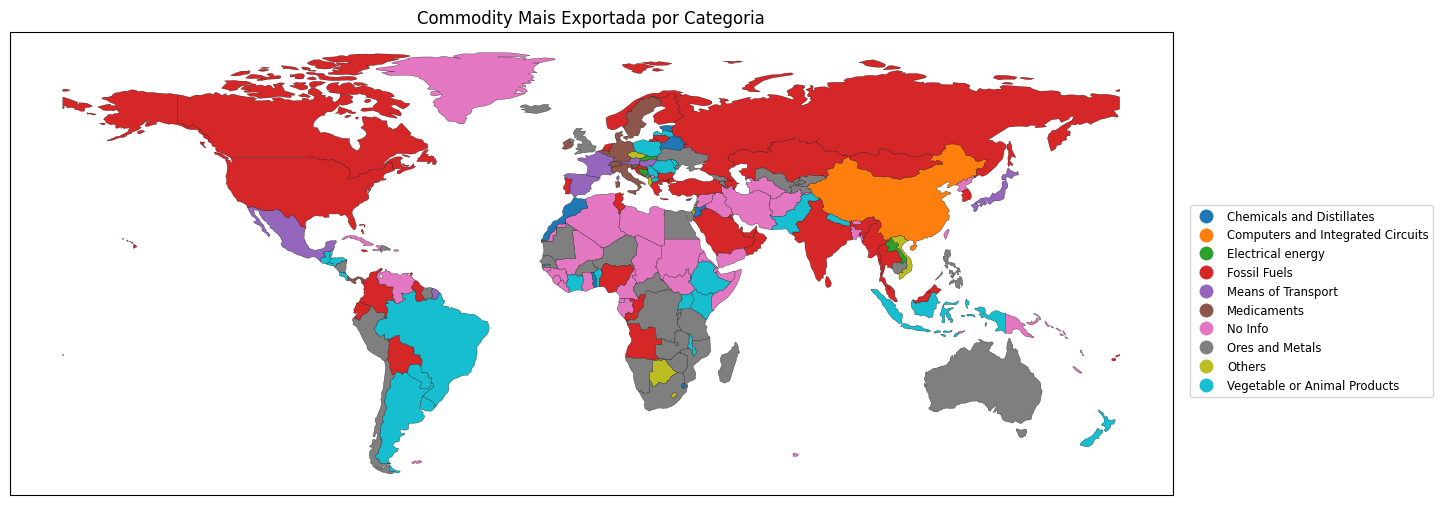

In [ ]:
import matplotlib.pyplot as plt

figura, eixo = plt.subplots()

figura.set_figheight(10)
figura.set_figwidth(15)


countries.plot(ax=eixo, column='Commodity', edgecolor="black", linewidth=0.2, categorical=True, legend=True,
              legend_kwds={'loc':'lower left',
                        'bbox_to_anchor':(1.01, 0.2),
                        'markerscale':1,
                        'title_fontsize':'medium',
                        'fontsize':'small'})

eixo.set_xticks([])
eixo.set_yticks([])

eixo.set_title("Commodity Mais Exportada por Categoria")

# COMMODITIES MAIS EXPORTADAS/IMPORTADAS NO ANO DE 2022


In [ ]:
dados_2022 = dados_commodities.query("Year == 2022")


dados_exp = dados_2022.query("Flow == 'Export'")
dados_imp = dados_2022.query("Flow == 'Import'")

agrupado_exp = dados_exp.groupby('Commodity')['Trade (USD)'].sum()
agrupado_imp = dados_imp.groupby('Commodity')['Trade (USD)'].sum()


agrupado_exp = agrupado_exp.to_frame().sort_values('Trade (USD)', ascending=False)
agrupado_imp = agrupado_imp.to_frame().sort_values('Trade (USD)', ascending=False)




,Trade (USD),Commodity
Commodity,,
Commodities not specified according to kind,1.056875e+12,Commodities not specified according to kind
"Oils; petroleum oils and oils obtained from bituminous minerals, crude",6.234943e+11,Fossil Fuels
"Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; not light oils and preparations",6.228587e+11,Fossil Fuels
"Medicaments; consisting of mixed or unmixed products n.e.c. in heading no. 3004, for therapeutic or prophylactic uses, packaged for retail sale",4.751235e+11,Medicaments
"Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; light oils and preparations",3.954622e+11,Fossil Fuels
"Petroleum gases and other gaseous hydrocarbons; in gaseous state, natural gas",2.962954e+11,Fossil Fuels
"Metals; gold, non-monetary, unwrought (but not powder)",2.342971e+11,Ores and Metals
"Electronic integrated circuits; processors and controllers, whether or not combined with memories, converters, logic circuits, amplifiers, clock and timing circuits, or other circuits",2.019936e+11,Tecnology
"Blood, human or animal, antisera, other blood fractions and immunological products; immunological products, put up in measured doses or in forms or packings for retail sale",1.947615e+11,Medicaments


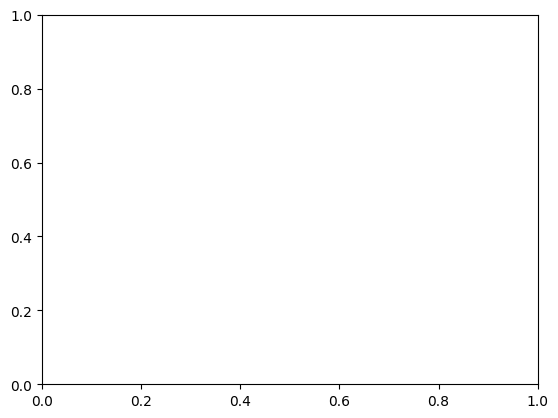

In [ ]:
fig, ax = plt.subplots()

agrupado_exp['Commodity'] = agrupado_exp.index

total = sum(agrupado_exp['Trade (USD)'])


agrupado_exp["Commodity"].replace(regex=r'.*(Petroleum|petroleum|Coal).*', value='Fossil Fuels', inplace=True)

agrupado_exp["Commodity"].replace(regex=r'.*ores.*', value='Ores and Metals', inplace=True)
agrupado_exp["Commodity"].replace(regex=r'.*(unwrought|gold|Copper|Nickel|Ores|ores|metals|Metal|Iron|Steel).*', value='Ores and Metals', inplace=True)

agrupado_exp["Commodity"].replace(regex=r'.*(circuits|smartphones|Telephones|Machines).*', value= 'Tecnology', inplace=True)
agrupado_exp["Commodity"].replace(regex=r'.*(Aeroplanes|Vessels|Sailboats|Vehicles|Railway).*', value= 'Means of Transport', inplace=True)
agrupado_exp["Commodity"].replace(regex=r'.*(milk|Fish|sunflower|Tobacco|Flowers|Nuts|Cocoa|Cereals|Spices|Fruit|Wheat|Soya|soya|Coffee|Sugars|Vegetable|tobacco).*', value= 'Vegetable or Animal Products', inplace=True)
agrupado_exp["Commodity"].replace(regex=r'.*(Medicaments|Blood).*', value= 'Medicaments', inplace=True)
agrupado_exp["Commodity"].replace(regex=r'.*(Fertilizers|Odoriferous|coal tar|Cosmetic|Rum|Beer|Alcohols).*', value= 'Chemicals and Distillates', inplace=True)
agrupado_exp["Commodity"].replace(regex=r'.*(Nonwovens|Paintings|Footwear|Sports|Tricycles|Musical|Jewellery|Diamonds|Pearls).*', value="Others", inplace=True)


agrupado_exp.head(10)


#ax.pie(agrupado_exp['Trade (USD)'], labels=agrupado_exp['Commodity'], autopct='%1.1f%%', textprops = {'fontsize': 8})




In [ ]:
# Exportações quue contam para menos de 0.1% do total de exportações do mundo representam mais de 45% daas exportações totais

cont = 0
soma = 0
for commodity, i in zip(agrupado_exp['Commodity'], agrupado_exp['Trade (USD)']):
  if(i / total > 0.001):
    cont += 1

  else:
    soma += i / total

print(cont)
print(soma)

139
0.45269894835118996


# PAÍSES QUE MAIS IMPORTAM/EXPORTAM DETERMINADA COMMODITY NO ANO

In [ ]:
dados_2022 = dados_commodities.query("Year == 2022")


dados_2022.index = range(len(dados_2022))

dados_exp = dados_2022.query("Flow == 'Export'")
dados_imp = dados_2022.query("Flow == 'Import'")



index_maximos = dados_exp.groupby('Commodity')['Trade (USD)'].idxmax()
index_maximos_imp = dados_imp.groupby('Commodity')['Trade (USD)'].idxmax()



maximos_por_commoditie = pd.DataFrame()



for i in index_maximos.to_frame()["Trade (USD)"].unique():
  a = dados_2022.loc[i].to_frame().T
  maximos_por_commoditie = pd.concat([maximos_por_commoditie, a])


maximos_por_commoditie_imp = pd.DataFrame()


for i in index_maximos_imp.to_frame()["Trade (USD)"].unique():
  a = dados_2022.loc[i].to_frame().T
  maximos_por_commoditie_imp = pd.concat([maximos_por_commoditie_imp, a])







## Só do Brasil:

In [ ]:
max_brasil_exp = maximos_por_commoditie.query("`Country or Area` == 'Brazil'")
max_brasil_imp = maximos_por_commoditie_imp.query("`Country or Area` == 'Brazil'")

Acrescentando porcentagem na do Brasil



In [ ]:
totais = dados_exp.groupby('Commodity')['Trade (USD)'].sum()

max_brasil_exp.index = max_brasil_exp['Commodity']

porcentagens = pd.Series()

for c in max_brasil_exp['Commodity'].unique():
   porcentagens[c] = max_brasil_exp.loc[c]['Trade (USD)'] / totais.loc[c]

porcentagens = porcentagens.to_frame()


max_brasil_exp['Porcentagem'] = porcentagens


max_brasil_exp.sort_values('Trade (USD)', ascending=False, inplace=True)

<ipython-input-105-0e68d801a861>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_brasil_exp['Porcentagem'] = porcentagens
<ipython-input-105-0e68d801a861>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_brasil_exp.sort_values('Trade (USD)', ascending=False, inplace=True)


In [ ]:
totais_imp = dados_imp.groupby('Commodity')['Trade (USD)'].sum()

max_brasil_imp.index = max_brasil_imp['Commodity']

porcentagens_imp = pd.Series()

for c in max_brasil_imp['Commodity'].unique():
   porcentagens_imp[c] = max_brasil_imp.loc[c]['Trade (USD)'] / totais_imp.loc[c]

porcentagens_imp = porcentagens_imp.to_frame()


max_brasil_imp['Porcentagem'] = porcentagens_imp


max_brasil_imp.sort_values('Trade (USD)', ascending=False, inplace = True)

max_brasil_imp["Commodity"].replace(regex=r'.*Fertilizers.*', value= 'Fertilizers', inplace=True)
max_brasil_imp["Commodity"].replace(regex=r'.*Herbicides.*', value= 'Herbicides', inplace=True)
max_brasil_imp["Commodity"].replace(regex=r'.*Insecticides.*', value= 'Insecticides', inplace=True)

max_brasil_imp




<ipython-input-106-72861ebc07be>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_brasil_imp['Porcentagem'] = porcentagens_imp
<ipython-input-106-72861ebc07be>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_brasil_imp.sort_values('Trade (USD)', ascending=False, inplace = True)
<ipython-input-106-72861ebc07be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_brasi

,Unnamed: 0,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,Porcentagem
Commodity,,,,,,,,,,
"Fertilizers, mineral or chemical; potassic, potassium chloride",2528335,Brazil,2022,Fertilizers,Import,9395244105.0,11806151645.073,Weight in kilograms,11806151645.073,0.294236
"Fertilizers, mineral or chemical; ammonium dihydrogenorthophosphate (monoammonium phosphate) and mixtures thereof with diammonium hydrogenorthophosphate (diammonium phosphate)",2528347,Brazil,2022,Fertilizers,Import,3986539292.0,4071051358.0,Weight in kilograms,4071051358.0,0.370393
"Herbicides, anti-sprouting products and plant-growth regulators; other than containing goods of Subheading Note 1 to this Chapter; put up in forms or packings for retail sale or as preparations or articles",3147568,Brazil,2022,Herbicides,Import,3421649023.0,393611294.91,Weight in kilograms,393611294.91,0.237539
"Fertilizers, mineral or chemical; containing the two fertilizing elements nitrogen and phosphorus, other than nitrates and phosphates",2528351,Brazil,2022,Fertilizers,Import,2216461581.0,2540953954.0,Weight in kilograms,2540953954.0,0.370869
Insecticides; other than containing goods specified in Subheading Notes 1 & 2 to this Chapter; put up in forms or packings for retail sale or as preparations or articles,3147564,Brazil,2022,Insecticides,Import,2003400623.0,109354481.627,Weight in kilograms,109354481.627,0.250332
...,...,...,...,...,...,...,...,...,...,...
Halogenated organo-phosphorous derivatives; trichlorfon (ISO),2328070,Brazil,2022,Halogenated organo-phosphorous derivatives; tr...,Import,230820.0,46459.579,Weight in kilograms,46459.579,0.714201
"Alkaloids; of rye ergot and their derivatives, ergometrine (INN) and its salts",2328195,Brazil,2022,"Alkaloids; of rye ergot and their derivatives,...",Import,95317.0,3.0,Weight in kilograms,3.0,0.537880
"Alkaloids; of ephedrine and their derivatives; levometamfetamine, metamfetamine (INN), metamefetamine racemate and their salts",2328191,Brazil,2022,Alkaloids; of ephedrine and their derivatives;...,Import,7500.0,NaN,No Quantity,NaN,0.337468


In [ ]:




max_br_exp_top_5 = max_brasil_exp.head(5)

max_br_imp_top_5 = max_brasil_imp.head(5)

max_br_imp_top_5

,Unnamed: 0,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,Porcentagem
Commodity,,,,,,,,,,
"Fertilizers, mineral or chemical; potassic, potassium chloride",2528335,Brazil,2022,Fertilizers,Import,9395244105.0,11806151645.073,Weight in kilograms,11806151645.073,0.294236
"Fertilizers, mineral or chemical; ammonium dihydrogenorthophosphate (monoammonium phosphate) and mixtures thereof with diammonium hydrogenorthophosphate (diammonium phosphate)",2528347,Brazil,2022,Fertilizers,Import,3986539292.0,4071051358.0,Weight in kilograms,4071051358.0,0.370393
"Herbicides, anti-sprouting products and plant-growth regulators; other than containing goods of Subheading Note 1 to this Chapter; put up in forms or packings for retail sale or as preparations or articles",3147568,Brazil,2022,Herbicides,Import,3421649023.0,393611294.91,Weight in kilograms,393611294.91,0.237539
"Fertilizers, mineral or chemical; containing the two fertilizing elements nitrogen and phosphorus, other than nitrates and phosphates",2528351,Brazil,2022,Fertilizers,Import,2216461581.0,2540953954.0,Weight in kilograms,2540953954.0,0.370869
Insecticides; other than containing goods specified in Subheading Notes 1 & 2 to this Chapter; put up in forms or packings for retail sale or as preparations or articles,3147564,Brazil,2022,Insecticides,Import,2003400623.0,109354481.627,Weight in kilograms,109354481.627,0.250332
